In [1]:
import descarteslabs as dl
import numpy as np
import matplotlib.pyplot as plt
import faiss
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import main
import models

In [4]:
DIR="/home/jovyan/gtc-exposure/data/"
ARCH="vgg16"
#LR=0.05
LR=0.025
K=10
EPOCHS = 20
WD=-5
EXP='/home/jovyan/gtc-exposure/deepcluster/output/'

In [5]:
model = models.__dict__[ARCH](sobel=True)
fd = int(model.top_layer.weight.size()[1])
model.top_layer = None
model.features = torch.nn.DataParallel(model.features)
model.cuda()
cudnn.benchmark = True

# create optimizer
optimizer = torch.optim.SGD(
    filter(lambda x: x.requires_grad, model.parameters()),
    lr=LR,
    momentum=0.9,
    weight_decay=10**WD,
)

# define loss function
criterion = nn.CrossEntropyLoss().cuda()

In [6]:
checkpoint = torch.load(EXP+'checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
dev=torch.device("cuda") 
model.to(dev)
model.eval()

# preprocessing of data
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
tra = [transforms.Resize(224),
       transforms.ToTensor(),
       normalize]

In [ ]:
DATA='/home/jovyan/gtc-exposure/data/'
dataset = datasets.ImageFolder(DATA, transform=transforms.Compose(tra))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
count = 0
index = []
with torch.no_grad():
    for data in data_loader:
        data = data[0].numpy()
        output = model(torch.tensor(data).to(dev))
        index.append(output.data.cpu().numpy().argmax())
        if count<=:
            dl.scenes.display(*data, size = 4)
            print(index[count])
        count+=1

In [ ]:
list(set(index))

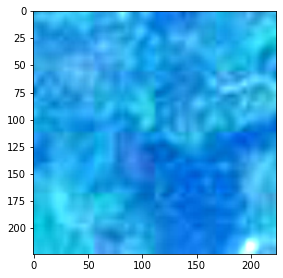

648


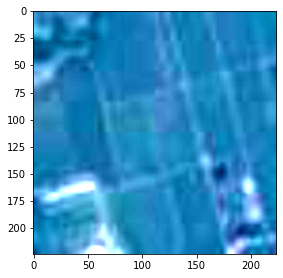

648


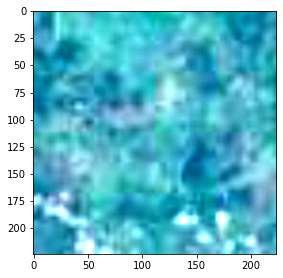

648


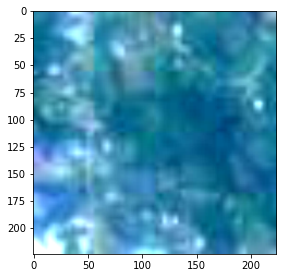

648


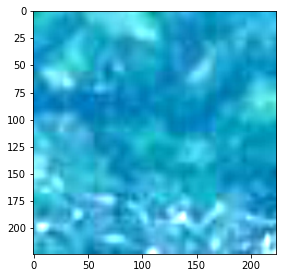

648


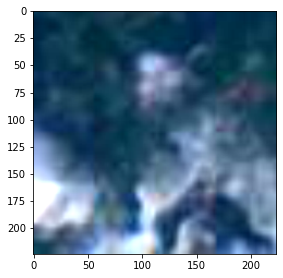

648


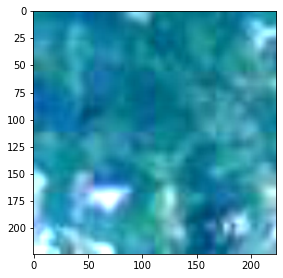

648


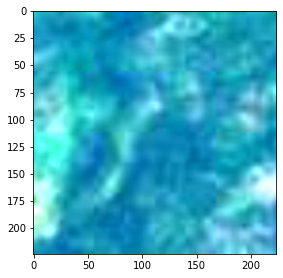

648


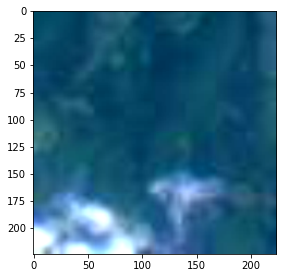

648


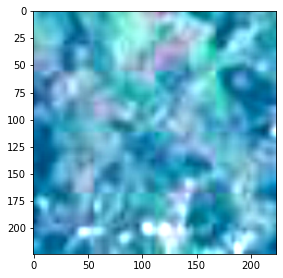

648


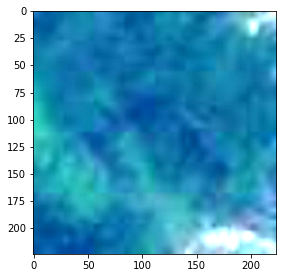

648


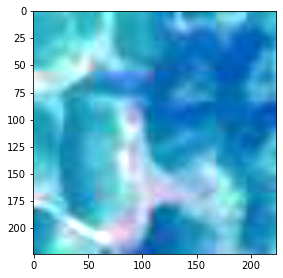

648


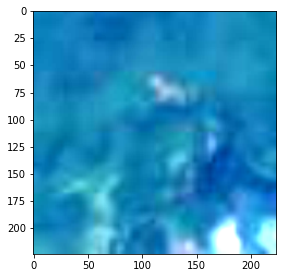

648


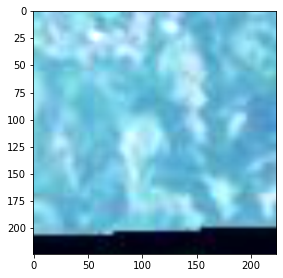

648


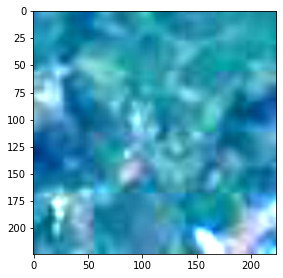

648


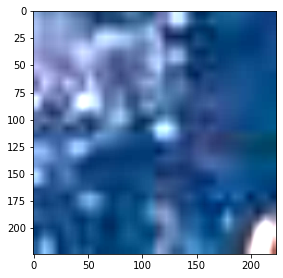

648


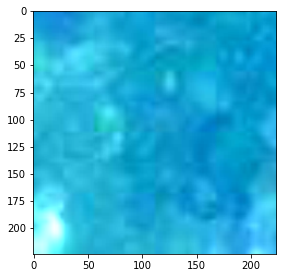

648


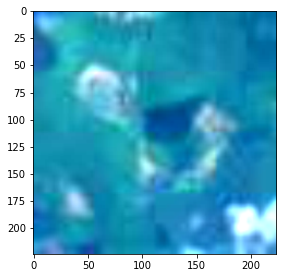

648


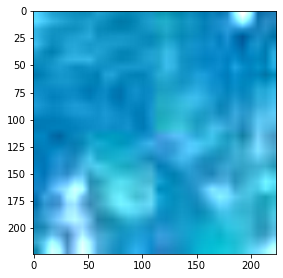

648


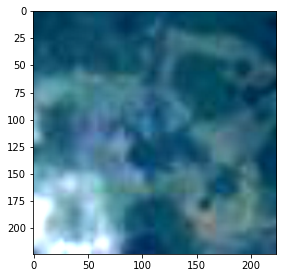

648


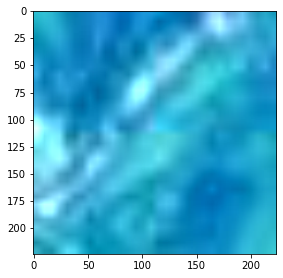

648


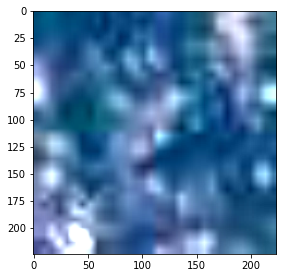

648


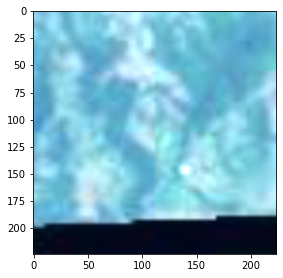

648


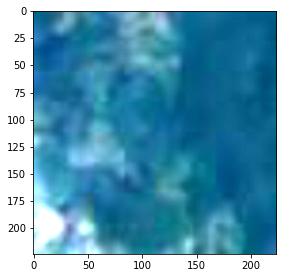

648


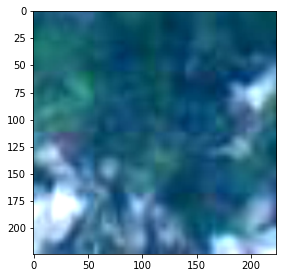

648


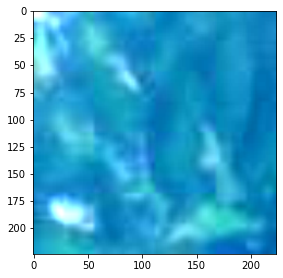

648


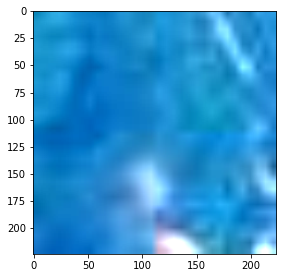

648


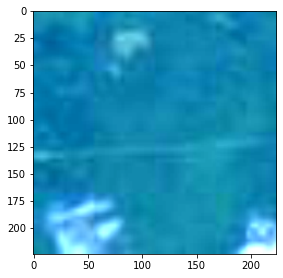

648


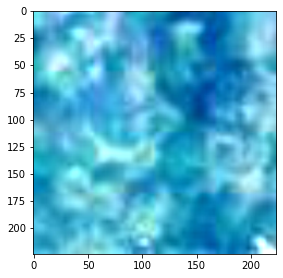

648


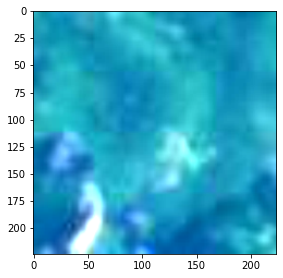

648


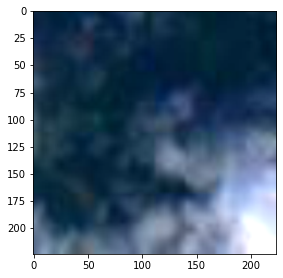

648


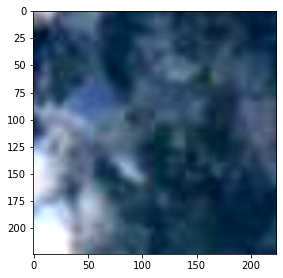

648


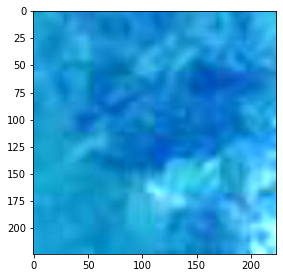

648


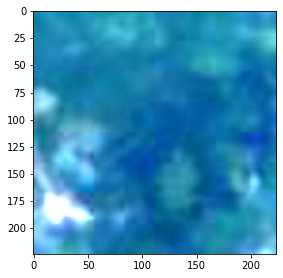

648


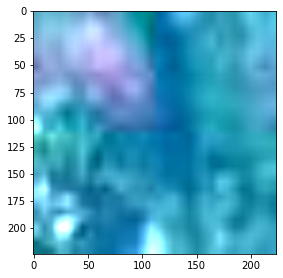

648


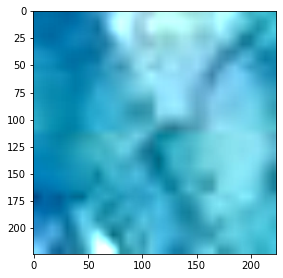

648


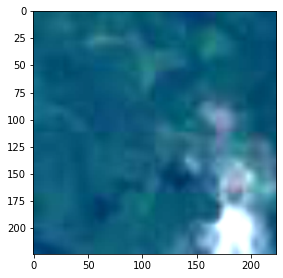

648


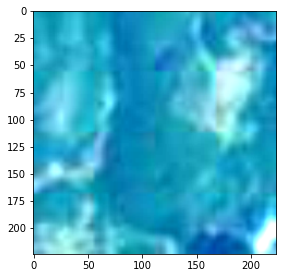

648


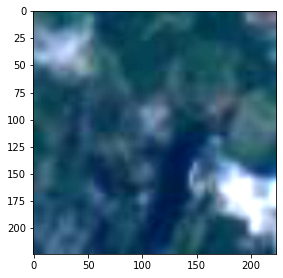

648


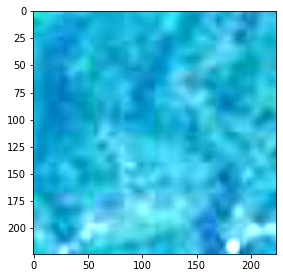

648


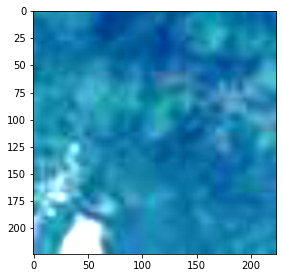

648


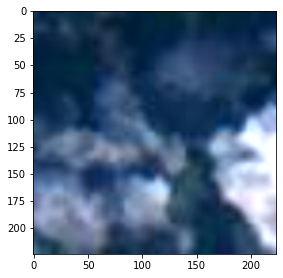

648


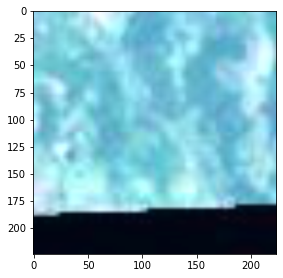

648


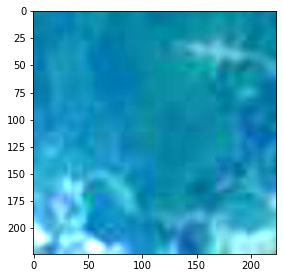

648


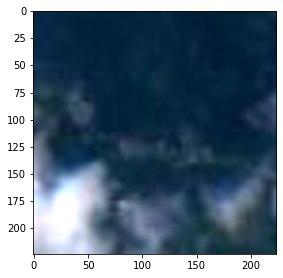

648


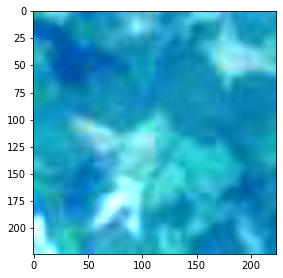

648


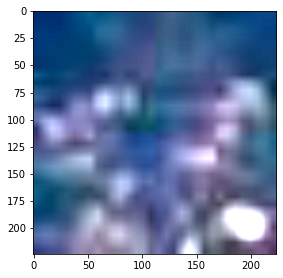

648


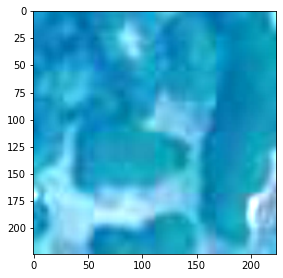

648


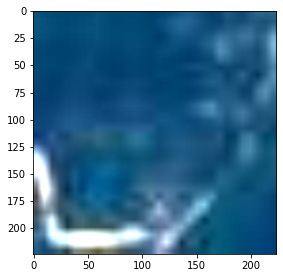

648


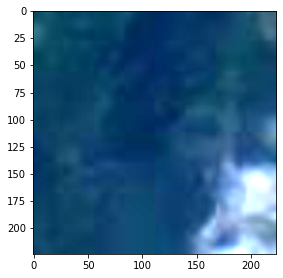

648


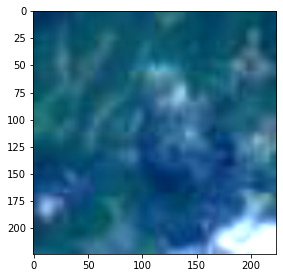

648


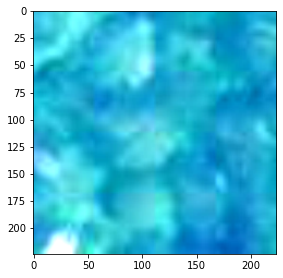

648


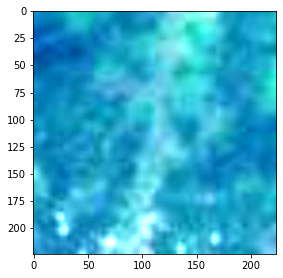

648


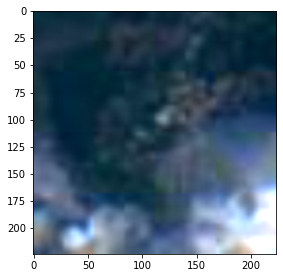

648


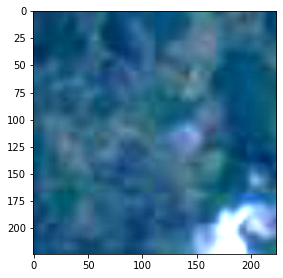

648


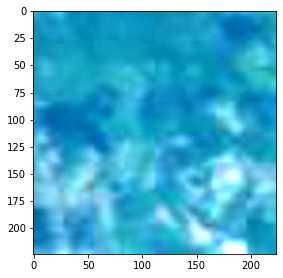

648


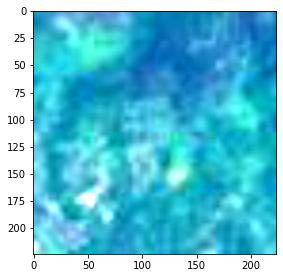

648


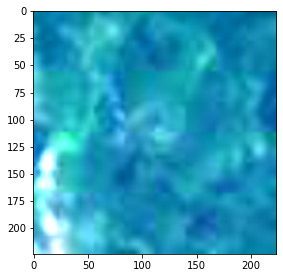

648


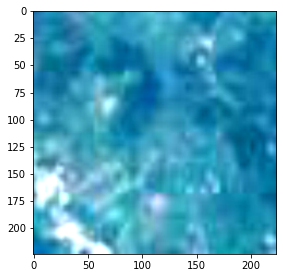

648


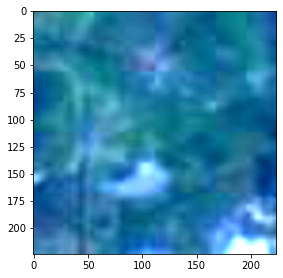

648


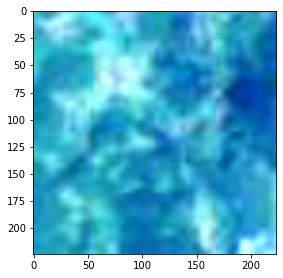

648


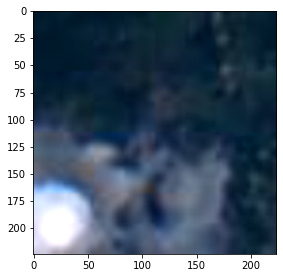

648


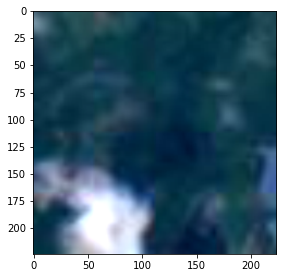

648


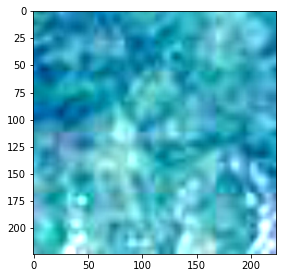

648


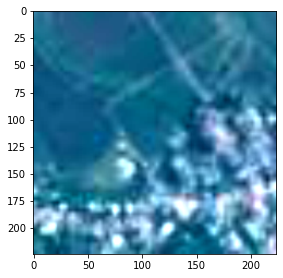

648


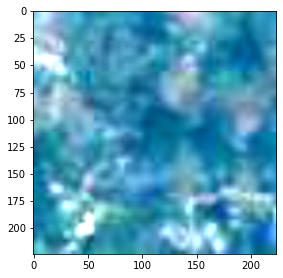

648


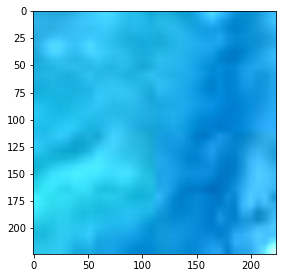

648


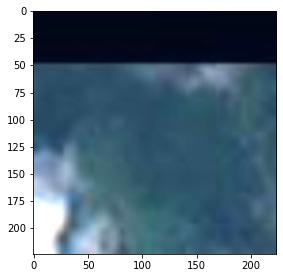

648


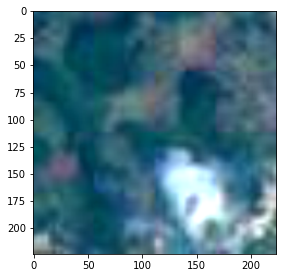

648


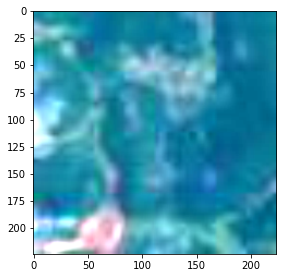

648


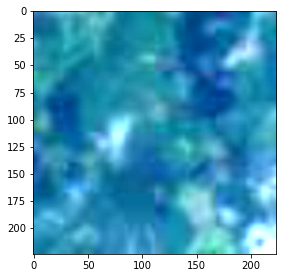

648


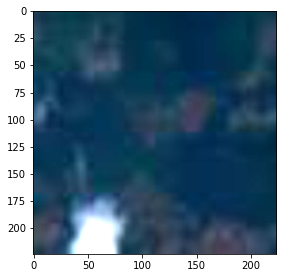

648


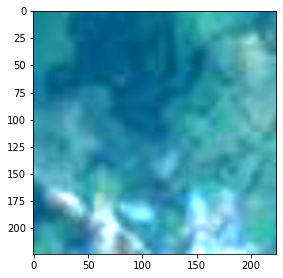

648


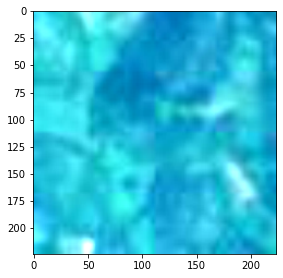

648


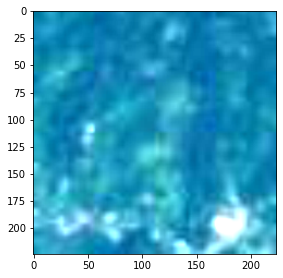

648


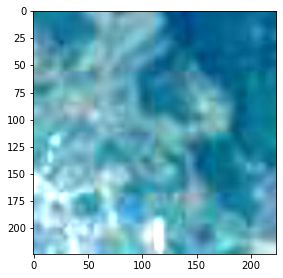

648


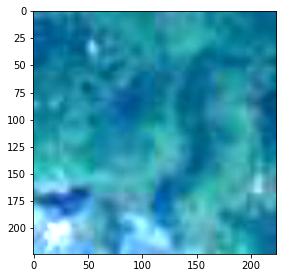

648


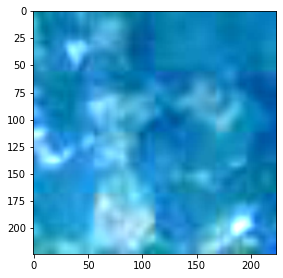

648


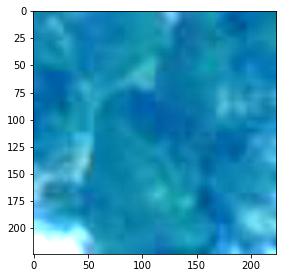

648


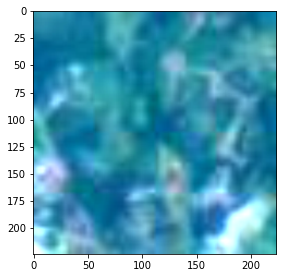

648


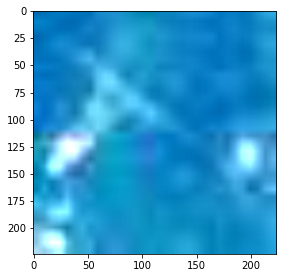

648


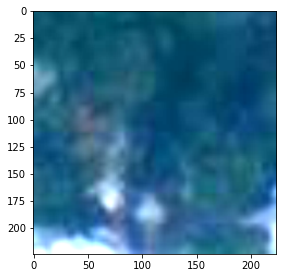

648


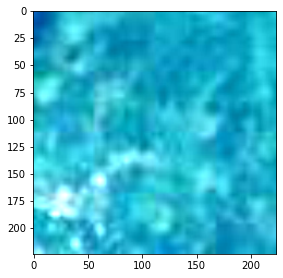

648


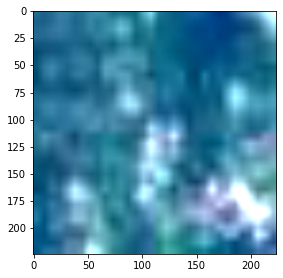

648


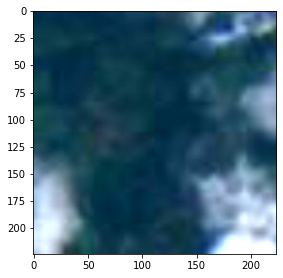

648


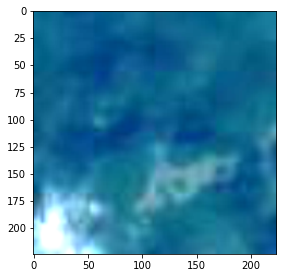

648


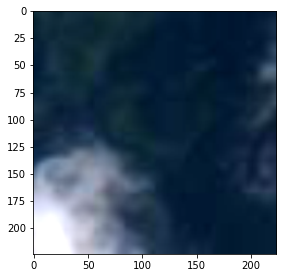

648


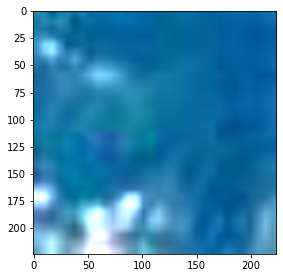

648


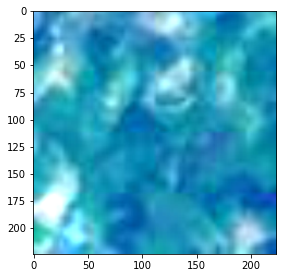

648


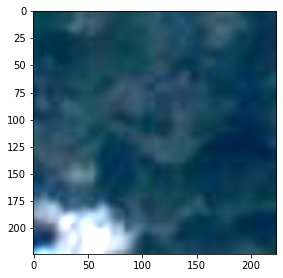

648


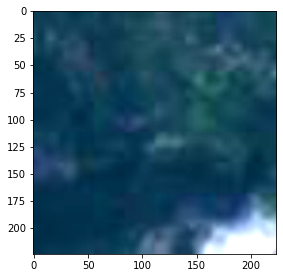

648


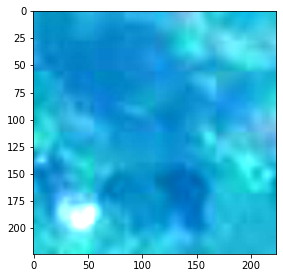

648


In [7]:
DATA='/home/jovyan/gtc-exposure/data/'
dataset = datasets.ImageFolder(DATA, transform=transforms.Compose(tra))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
count = 0
index = []
with torch.no_grad():
    for data in data_loader:
        data = data[0].numpy()
        output = model(torch.tensor(data).to(dev))
        index.append(output.data.cpu().numpy().argmax())
        if output.data.cpu().numpy().argmax()==648:
            dl.scenes.display(*data, size = 4)
            print(index[count])
        count+=1